# 布朗运动模拟

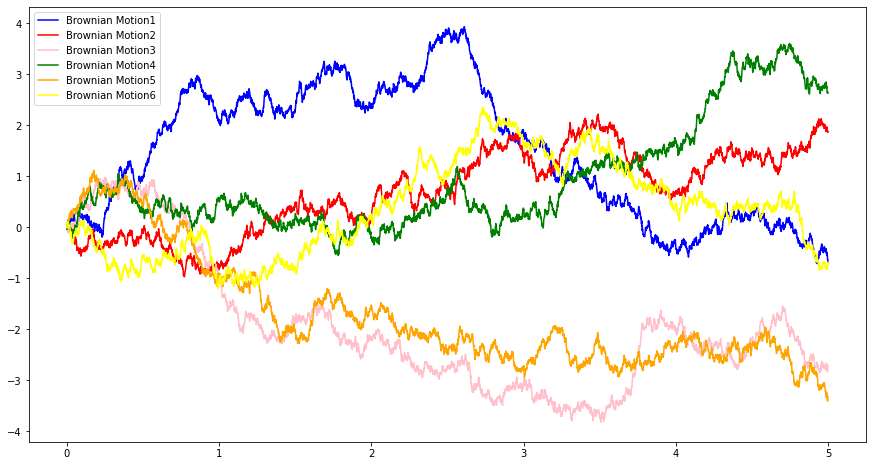

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [1]:
import numpy as np
import numpy.random as nprd
nprd.seed(19880505)

t=np.linspace(0.0,5.0,5000)
B1=np.zeros(len(t))
B2=np.zeros(len(t))
B3=np.zeros(len(t))
B4=np.zeros(len(t))
B5=np.zeros(len(t))
B6=np.zeros(len(t))
b1=b2=b3=b4=b5=b6=0
epsilon=np.sqrt(t[1]-t[0])
## 为了方便，以下使用循环，更好的写法：
# increment=nprd.normal(0,epsilon,len(t))
# B=np.cumsum(increment)
for tt in range(len(t)):
    B1[tt]=b1
    b1=b1+nprd.normal(0,epsilon)
    B2[tt]=b2
    b2=b2+nprd.normal(0,epsilon)
    B3[tt]=b3
    b3=b3+nprd.normal(0,epsilon)
    B4[tt]=b4
    b4=b4+nprd.normal(0,epsilon)
    B5[tt]=b5
    b5=b5+nprd.normal(0,epsilon)
    B6[tt]=b6
    b6=b6+nprd.normal(0,epsilon)
    
import matplotlib.pyplot as plt 
%matplotlib inline

# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
fig=plt.figure()
plt.plot(t,B1,label=r'Brownian Motion1',color='blue')
plt.plot(t,B2,label=r'Brownian Motion2',color='red')
plt.plot(t,B3,label=r'Brownian Motion3',color='pink')
plt.plot(t,B4,label=r'Brownian Motion4',color='green')
plt.plot(t,B5,label=r'Brownian Motion5',color='orange')
plt.plot(t,B6,label=r'Brownian Motion6',color='yellow')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图
fig.savefig("browina_motion.eps")

# 重对数律

/tmp/ipykernel_3459/528038580.py:20: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
/tmp/ipykernel_3459/528038580.py:20: RuntimeWarning: invalid value encountered in log
  plt.plot(t,np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
/tmp/ipykernel_3459/528038580.py:20: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(t,np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
/tmp/ipykernel_3459/528038580.py:21: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,-np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
/tmp/ipykernel_3459/528038580.py:21: RuntimeWarning: invalid value encountered in log
  plt.plot(t,-np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
/tmp/ipykernel_3459/528038580.py:21: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(t,-np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)


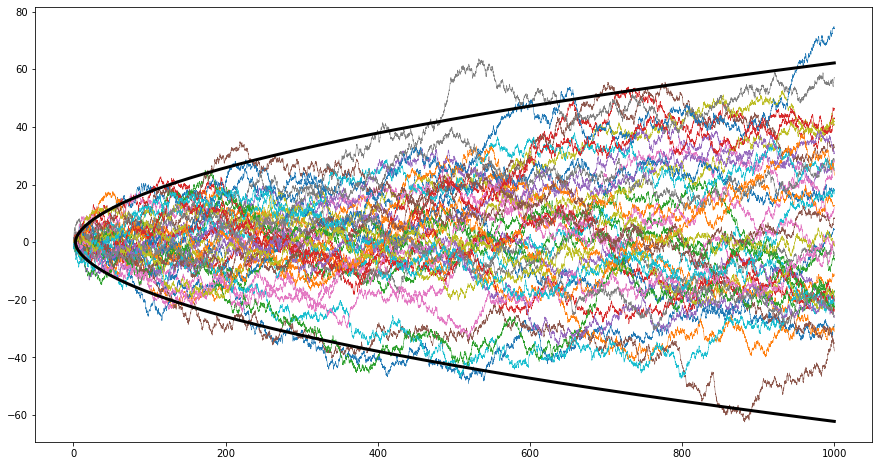

In [2]:
import numpy as np
import numpy.random as nprd
nprd.seed(19880505)
N_path=40
t=np.linspace(0.0,1000,10000)
B=[]
epsilon=np.sqrt(t[1]-t[0])
for i in range(N_path):
    increment=nprd.normal(0,epsilon,len(t))
    B.append(np.cumsum(increment))
    
import matplotlib.pyplot as plt 
%matplotlib inline

# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
fig=plt.figure()
for b in B:
    plt.plot(t,b, linewidth=0.5)
plt.plot(t,np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
plt.plot(t,-np.sqrt(2*t*np.log(np.log(t))), color='black', linewidth=3)
plt.show() ## 画图
fig.savefig("browina_motion_loglog.eps")

# H-自相似

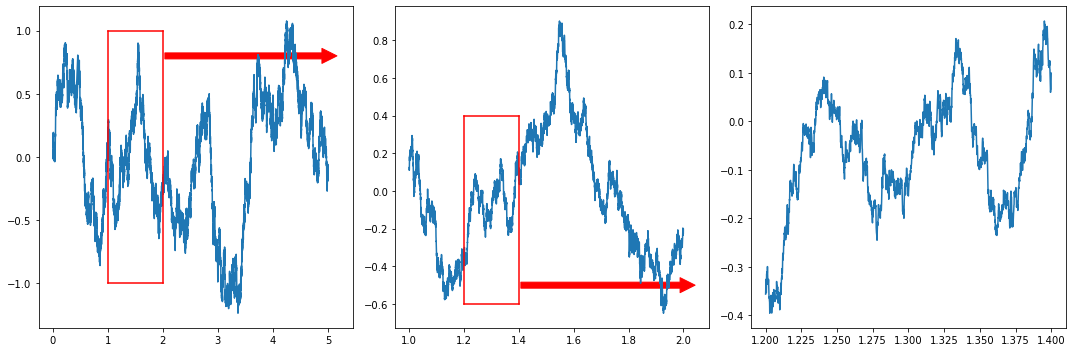

In [3]:
import numpy as np
import numpy.random as nprd
nprd.seed(19880505)

N=50000
t=np.linspace(0.0,5.0,N)
epsilon=np.sqrt(t[1]-t[0])
increment=nprd.normal(0,epsilon,len(t))
B=np.cumsum(increment)

plt.rcParams['figure.figsize'] = (15.0, 5.0)
fig, axs = plt.subplots(1, 3)

axs[0].plot(t,B)
axs[0].plot(np.array([1,2]),np.array([-1,-1]),color='red')
axs[0].plot(np.array([1,2]),np.array([1,1]),color='red')
axs[0].plot(np.array([1,1]),np.array([-1,1]),color='red')
axs[0].plot(np.array([2,2]),np.array([-1,1]),color='red')
subt1=t[int(N*1/5):int(N*2/5)]
subB1=B[int(N*(1/5)):int(N*2/5)]
N1=len(subt1)
axs[1].plot(subt1,subB1)
axs[1].plot(np.array([1.2,1.4]),np.array([-0.6,-0.6]),color='red')
axs[1].plot(np.array([1.2,1.4]),np.array([0.4,0.4]),color='red')
axs[1].plot(np.array([1.2,1.2]),np.array([-0.6,0.4]),color='red')
axs[1].plot(np.array([1.4,1.4]),np.array([-0.6,0.4]),color='red')
subt2=subt1[int(N1*1/5):int(N1*2/5)]
subB2=subB1[int(N1*(1/5)):int(N1*2/5)]
axs[2].plot(subt2,subB2)

import matplotlib.patches as mpatches
arrow = mpatches.FancyArrowPatch((2, 0.8), (5.2, 0.8),mutation_scale=30, color='red')
axs[0].add_patch(arrow)
arrow = mpatches.FancyArrowPatch((1.4, -0.5), (2.05, -0.5),mutation_scale=30, color='red')
axs[1].add_patch(arrow)

fig.tight_layout()
fig.savefig("browina_motion_h_similar.eps")
plt.show()

# 几何布朗运动模拟

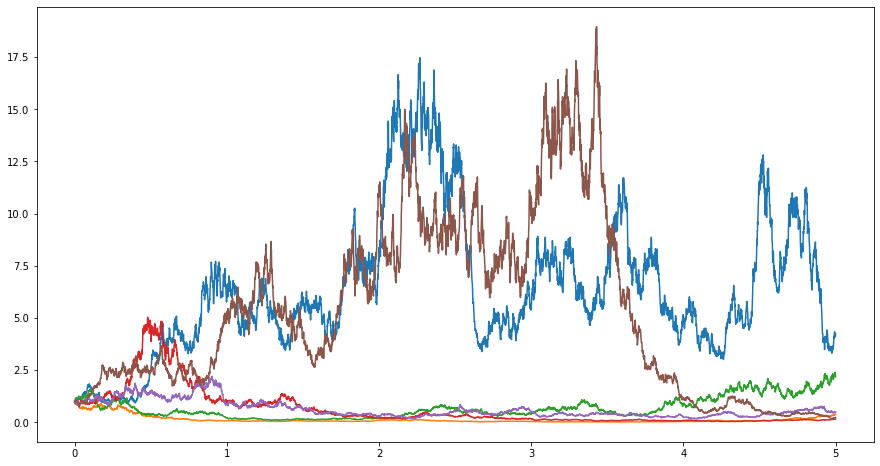

In [4]:
nprd.seed(19880505)
N_path=6
t=np.linspace(0.0,5,5000)
B=[]
epsilon=np.sqrt(t[1]-t[0])
for i in range(N_path):
    increment=nprd.normal(0,epsilon,len(t))
    B.append(np.exp(np.cumsum(increment)))
    
import matplotlib.pyplot as plt 
%matplotlib inline

# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
fig=plt.figure()
for b in B:
    plt.plot(t,b)
plt.show() ## 画图
fig.savefig("exponential_browina_motion.eps")


# 布朗桥模拟

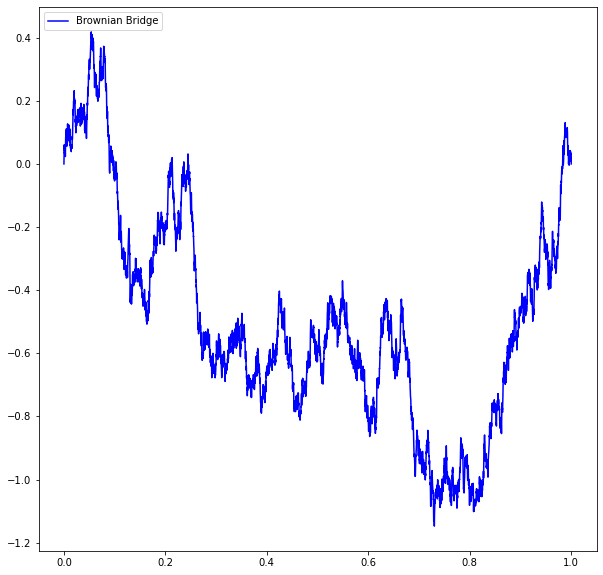

In [5]:
t=np.linspace(0.0,1.0,5000)
B=np.zeros(len(t))
BB=np.zeros(len(t))
b=0
epsilon=np.sqrt(t[1]-t[0])
for tt in range(len(t)):
    B[tt]=b
    b=b+nprd.normal(0,epsilon)
for tt in range(len(t)):
    BB[tt]=B[tt]-t[tt]*B[-1]
    
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.plot(t,BB,label=r'Brownian Bridge',color='blue')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

# 二维布朗运动

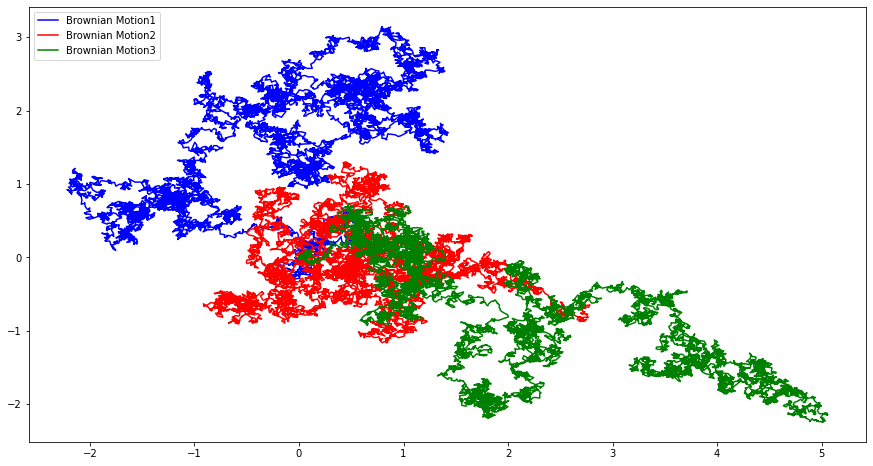

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
import numpy as np
import numpy.random as nprd

t=np.linspace(0.0,5.0,10000)
B1=np.zeros(len(t))
B2=np.zeros(len(t))
B3=np.zeros(len(t))
B4=np.zeros(len(t))
B5=np.zeros(len(t))
B6=np.zeros(len(t))
b1=b2=b3=b4=b5=b6=0
epsilon=np.sqrt(t[1]-t[0])
for tt in range(len(t)):
    B1[tt]=b1
    b1=b1+nprd.normal(0,epsilon)
    B2[tt]=b2
    b2=b2+nprd.normal(0,epsilon)
    B3[tt]=b3
    b3=b3+nprd.normal(0,epsilon)
    B4[tt]=b4
    b4=b4+nprd.normal(0,epsilon)
    B5[tt]=b5
    b5=b5+nprd.normal(0,epsilon)
    B6[tt]=b6
    b6=b6+nprd.normal(0,epsilon)

    
import matplotlib.pyplot as plt 
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
fig=plt.figure()
plt.plot(B1,B2,label=r'Brownian Motion1',color='blue')
plt.plot(B3,B4,label=r'Brownian Motion2',color='red')
plt.plot(B5,B6,label=r'Brownian Motion3',color='green')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图
fig.savefig("browina_motion_2d.eps")